## **Introduction and Background**

Body mass index (BMI) is used to determine the body mass index by the body mass quotient expressed in kilograms (kg) by the square of body height expressed in square meters (m2). Body mass index is the most popular determinant of health to determine different aspects of its impact on physical, psychological, and social aspects of life. Body mass index is widely used to estimate the risk of underweight and obesity of examined person for the development of or the prevalence of several health issuses as it may be associated with the development of diseases classified as civilization diseases, such as diabetes, stroke, atherosclerosis, hypertension and nutrition disorders. The World Health Organization (WHO) has identified six ranges defining the state of the subject. 

Collectively,  BMI study in the overall population can help measuring the rates of obesity in a population. As BMI is widely used by many healthcare providers and commonly works for most people, having changes in BMI levels provides an understanding of the ways overweight and obesity differ over time and in between distinct populations. This BMI information can also be a such an valuable information for health researchers to study the obesity epidemic and also policy maker to determine public health policies.

This analytical study focus on determining which predictor variablesthat significantly influence the BMI level and how much significant the predictor's value to the BMI by conducting statistical analysis including performing statistical test and regression analysis from the given dataset.

**Objective Analysis**
1. Which predictor variables on data that significantly influence the the level of someone's BMI?
2. How is the correlation between predictor variables and the level of BMI?
3. How is the BMI level can be predicted and be modeled using regression model based on its predictor variables?

In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [2]:
#Import data files from drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import and read data
path = "/content/drive/MyDrive/dataset obesity/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(path)

In [4]:
#Display the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
#Overview the data
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In this analysis, we are interested in particular variables which are gender, age, family history with overweight, FAVC, Smoke, FAF, TUE, MTRANS, and Nobeyesdad so we selected these columns for our further study.

## **Data Pre-Processing**

In [6]:
#Feature selection
df = df.loc[:,[
            "Gender",
            "Age",
            "family_history_with_overweight",
            "FAVC",
            "SMOKE",
            "FAF",
            "TUE",
            "MTRANS",
            "NObeyesdad"
            ]]
df.head()

,Gender,Age,family_history_with_overweight,FAVC,SMOKE,FAF,TUE,MTRANS,NObeyesdad
0,Female,21.0,yes,no,no,0.0,1.0,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,yes,3.0,0.0,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,no,2.0,1.0,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,no,2.0,0.0,Walking,Overweight_Level_I
4,Male,22.0,no,no,no,0.0,0.0,Public_Transportation,Overweight_Level_II


In [7]:
#Renaming the columns for better recalling
df = df.rename(columns={"Gender" : "gender",
                          "Age" : "age",
                          "NObeyesdad": "BMI", 
                          "family_history_with_overweight": "overweight_family",
                          "FAVC" : "high_caloric",
                          "SMOKE" :"smoke",
                          "FAF" : "physical_activity",
                          "TUE" : "device_time",
                          "MTRANS" : "transportation"
                          })
df.head()

,gender,age,overweight_family,high_caloric,smoke,physical_activity,device_time,transportation,BMI
0,Female,21.0,yes,no,no,0.0,1.0,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,yes,3.0,0.0,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,no,2.0,1.0,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,no,2.0,0.0,Walking,Overweight_Level_I
4,Male,22.0,no,no,no,0.0,0.0,Public_Transportation,Overweight_Level_II


In [8]:
#Create function to check unique data
def CheckUnique():
   print('gender : ', df['gender'].unique())
   print('age : ', df['age'].unique())
   print('overweight_family :', df['overweight_family'].unique()) 
   print('high_caloric :  ', df['high_caloric'].unique())
   print('smoke :', df['smoke'].unique())
   print('physical_activity :', df['physical_activity'].unique())
   print('device_time :', df['device_time'].unique())
   print('transportation :', df['transportation'].unique())
   print('BMI :', df['BMI'].unique())

In [9]:
# Calling the CheckUnique function
CheckUnique()

gender :  ['Female' 'Male']
age :  [21.       23.       27.       ... 22.524036 24.361936 23.664709]
overweight_family : ['yes' 'no']
high_caloric :   ['no' 'yes']
smoke : ['no' 'yes']
physical_activity : [0.       3.       2.       ... 1.414209 1.139107 1.026452]
device_time : [1.       0.       2.       ... 0.646288 0.586035 0.714137]
transportation : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
BMI : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


#### Checking Missing Values and Duplicates

In [10]:
#Checking missing values

print("Number of missing values:")
df.isna().sum()

Number of missing values:


gender               0
age                  0
overweight_family    0
high_caloric         0
smoke                0
physical_activity    0
device_time          0
transportation       0
BMI                  0
dtype: int64

In [11]:
#Checking duplicates
df.duplicated().sum()

80

In [12]:
# Remove duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [13]:
#Changing categorical data from string to numerical category
df_BMI = {"Insufficient_Weight": 0,
          "Normal_Weight": 1,
          "Overweight_Level_I": 2,
          "Overweight_Level_II": 3,
          "Obesity_Type_I": 4,
          "Obesity_Type_II": 5,
          "Obesity_Type_III": 6}

df_overweight_family = {"yes" : 1,
                        "no" : 0}

df_high_caloric  = {"yes" : 1,
                    "no" : 0}

df_smoke = {"yes" : 1,
            "no" : 0}

In [14]:
df['BMI'] = df['BMI'].replace(df_BMI)
df['overweight_family'] = df['overweight_family'].replace(df_overweight_family)
df['high_caloric'] = df['high_caloric'].replace(df_high_caloric)
df['smoke'] = df['smoke'].replace(df_smoke)
df.head()

,gender,age,overweight_family,high_caloric,smoke,physical_activity,device_time,transportation,BMI
0,Female,21.0,1,0,0,0.0,1.0,Public_Transportation,1
1,Female,21.0,1,0,1,3.0,0.0,Public_Transportation,1
2,Male,23.0,1,0,0,2.0,1.0,Public_Transportation,1
3,Male,27.0,0,0,0,2.0,0.0,Walking,2
4,Male,22.0,0,0,0,0.0,0.0,Public_Transportation,3


In [15]:
#Reviewing the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2031 non-null   object 
 1   age                2031 non-null   float64
 2   overweight_family  2031 non-null   int64  
 3   high_caloric       2031 non-null   int64  
 4   smoke              2031 non-null   int64  
 5   physical_activity  2031 non-null   float64
 6   device_time        2031 non-null   float64
 7   transportation     2031 non-null   object 
 8   BMI                2031 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 158.7+ KB


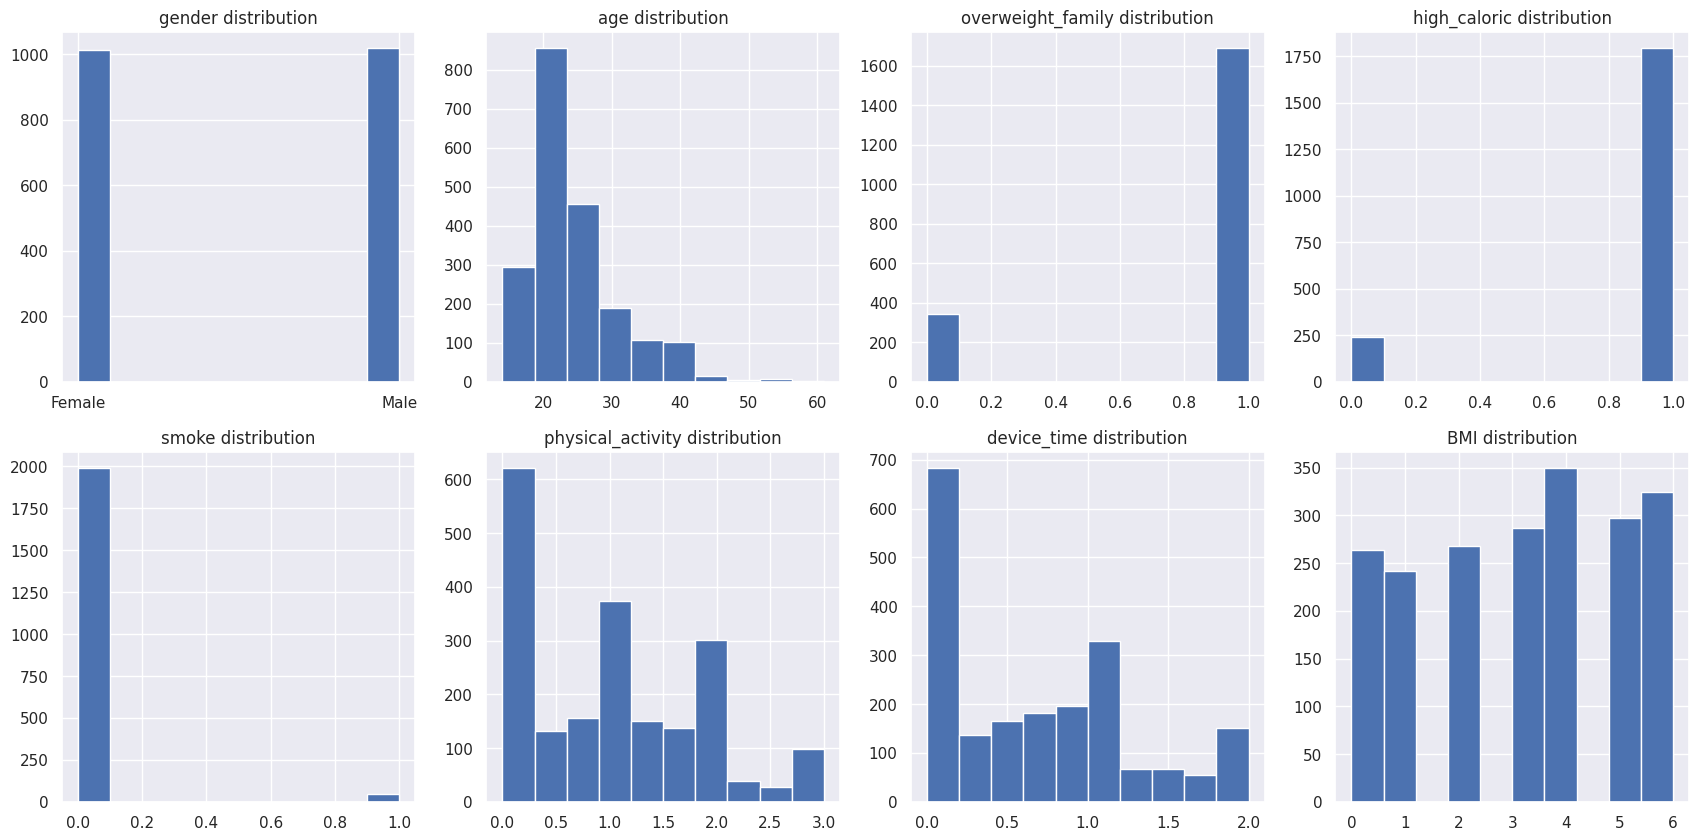

In [16]:
# Displaying data distributions
columns_ = ["gender", "age", "overweight_family", "high_caloric", "smoke", "physical_activity", "device_time", "BMI"]
index_ = 0
fig, ax = plt.subplots(2,4, figsize = (21,10))
for row in range(2):
    for col in range(4):
        ax[row,col].hist(df[columns_[index_]])
        ax[row,col].set_title(f"{columns_[index_]} distribution")
        index_ += 1
plt.show()


## **Exploratory Data Analysis**

#### 1. BMI Level based on Gender

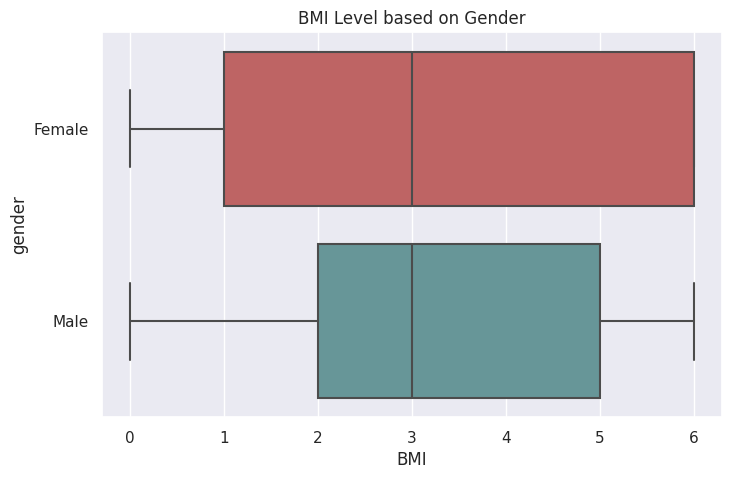

In [17]:
# Code used to see distribution of BMI level based on Gender category using boxplot
fig, ax = plt.subplots(figsize = (8,5))
my_palette = {'Male': '#5F9EA0', "Female" : '#CD5555'}
sns.boxplot(x = "BMI", y = "gender", data = df, ax = ax, palette = my_palette)
ax.set_title("BMI Level based on Gender")
plt.show()

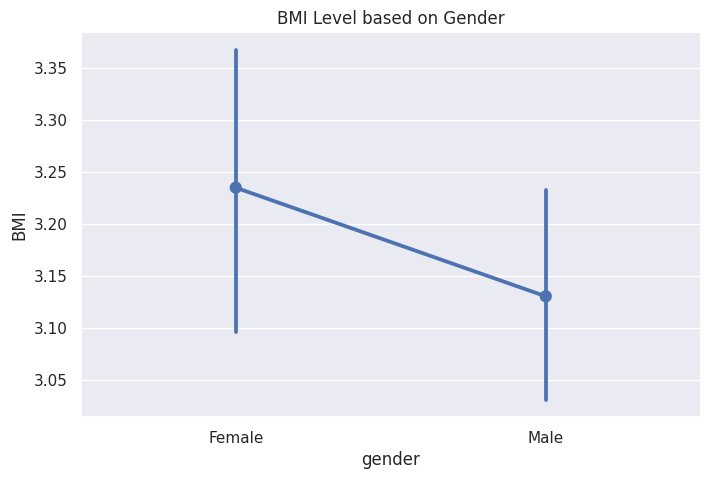

In [18]:
#Code used to see means from BMI level based on gender category using point plot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "BMI", x = "gender", data = df, ax = ax)
ax.set_title("BMI Level based on Gender")
plt.show()

Based on box plot and point plot, we can see there is difference of BMI level means based on gender that female is more likely to have higher BMI level than male. This condition is applicable to the samples we collected. To make inference to the population, we have to perform statistical test of T-test for the difference between two population means.

#### 2. BMI Level based on Family History of Overweight

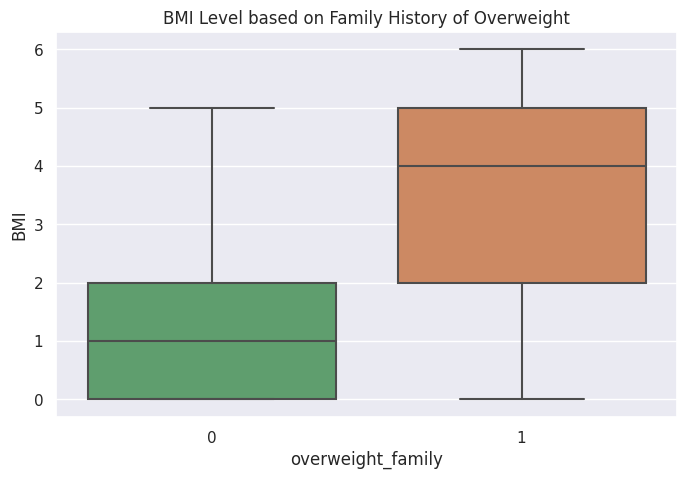

In [19]:
# Code used to see distribution of BMI level based on family history of overweight category using boxplot
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "overweight_family", y = "BMI", data = df, ax = ax, palette = my_palette1)
ax.set_title("BMI Level based on Family History of Overweight")
plt.show()

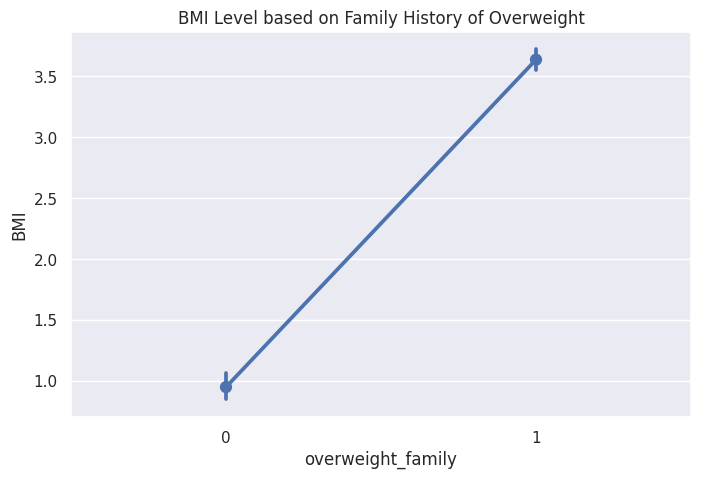

In [20]:
# Code used to see distribution of BMI level based on family history of overweight category using point plot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "BMI", x = "overweight_family", data = df, ax = ax)
ax.set_title("BMI Level based on Family History of Overweight")
plt.show()

Based on box plot and point plot, we can see there is difference of BMI level means based on family history of overweight that someone who has family member who is overweight is more likely to have higher BMI level than someone who has no family member who is overweight. This condition is applicable to the samples we collected. To make inference to the population, we have to perform statistical test of T-test for the difference between two population means.

#### 3. BMI Level based on Frequent Consumption of High Caloric Foods

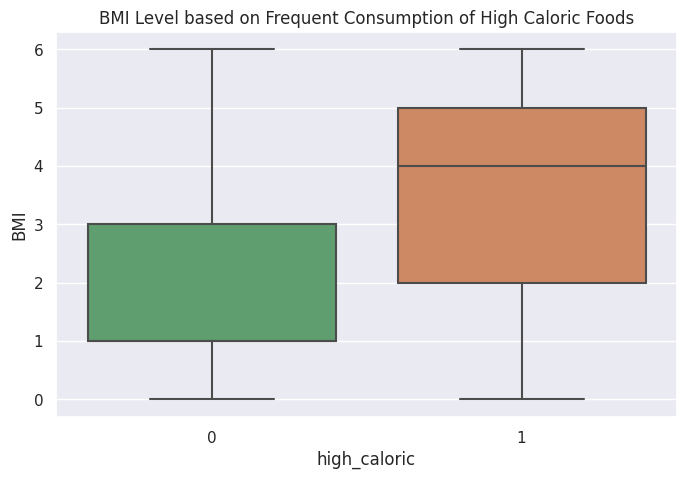

In [21]:
# Code used to see distribution of BMI level based on Frequent Consumption of High Caloric Foods category using boxplot
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "high_caloric", y = "BMI", data = df, ax = ax, palette = my_palette1)
ax.set_title("BMI Level based on Frequent Consumption of High Caloric Foods")
plt.show()

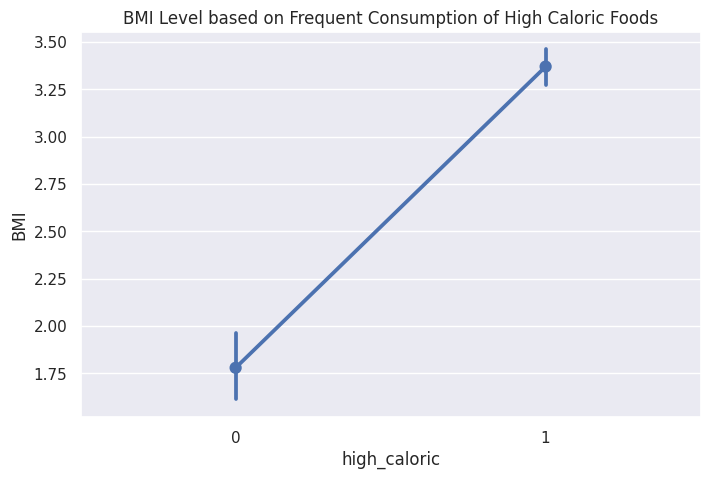

In [22]:
# Code used to see distribution of BMI level based on Frequent Consumption of High Caloric Foods category using boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "BMI", x = "high_caloric", data = df, ax = ax)
ax.set_title("BMI Level based on Frequent Consumption of High Caloric Foods")
plt.show()

Based on box plot and point plot, we can see there is difference of BMI level means based on frequent consumption of high caloric foods. This means someone who frequently consume high caloric foods is more likely to have higher BMI level than someone who does not. This condition is applicable to the samples we collected. To make inference to the population, we have to perform statistical test of T-test for the difference between two population means.

#### 4. BMI Level based on Smoking Status

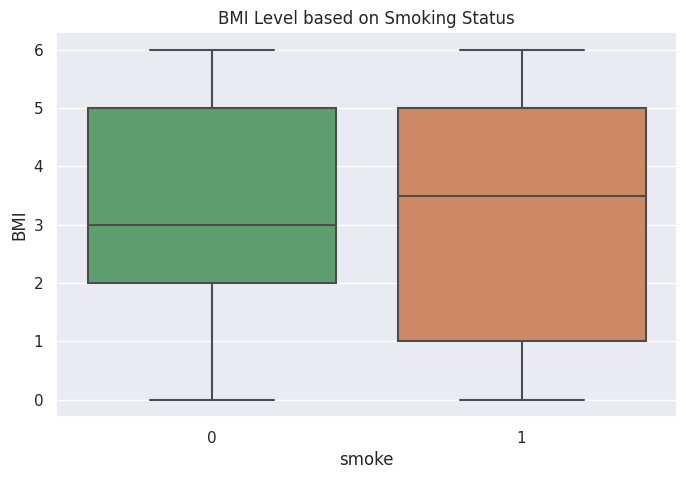

In [23]:
# Code used to see distribution of BMI level based on Smoking Status using boxplot
fig, ax = plt.subplots(figsize = (8,5))
my_palette1 = sns.color_palette("deep", n_colors=3)[::-1]
sns.boxplot(x = "smoke", y = "BMI", data = df, ax = ax, palette = my_palette1)
ax.set_title("BMI Level based on Smoking Status")
plt.show()

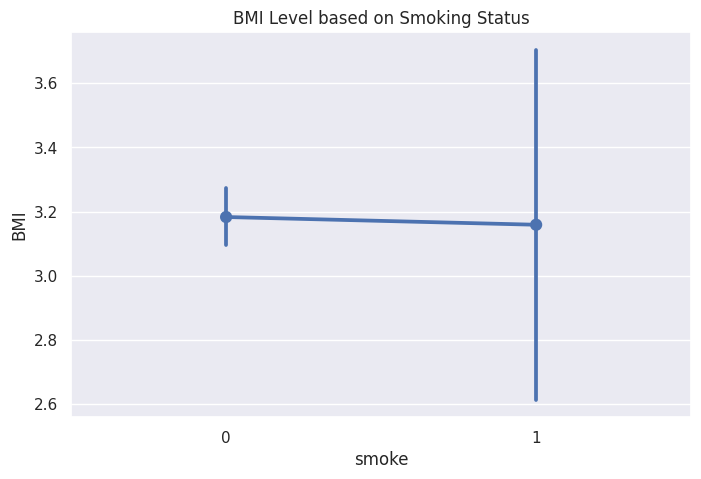

In [24]:
# Code used to see distribution of BMI level based on Smoking Status using lineplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "BMI", x = "smoke", data = df, ax = ax)
ax.set_title("BMI Level based on Smoking Status")
plt.show()

Based on box plot and point plot, we can see there is slight difference of BMI level means based on frequent consumption of high caloric foods. This means someone who does not smoke is more likely to have higher BMI level than someone smoke. However, we can see the difference is quite smalll. To see whether the difference is significant in the population and to make inference, we have to perform statistical test of T-test for the difference between two population means.

#### 5. BMI Level based on Means of Transportations

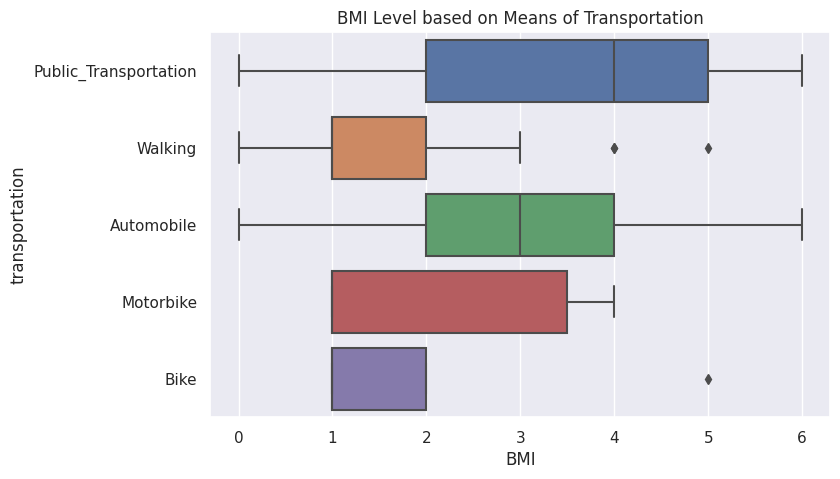

In [25]:
# Code used to see distribution of BMI level based on Smoking Status using boxplot
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "BMI", y = "transportation", data = df, ax = ax)
ax.set_title("BMI Level based on Means of Transportation")
plt.show()

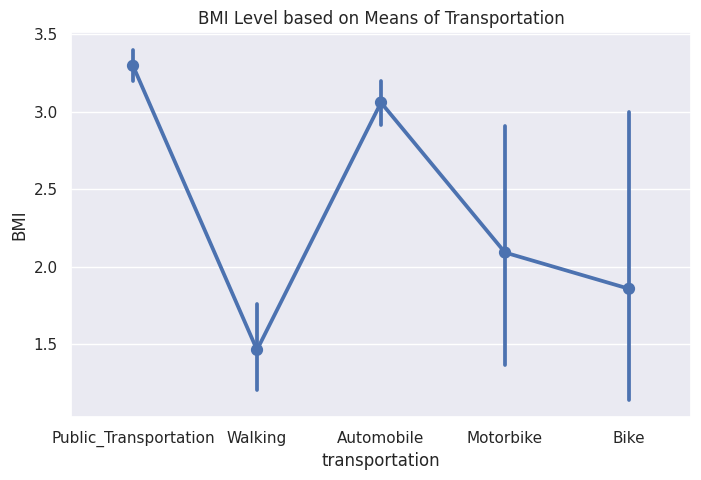

In [26]:
# Code used to see distribution of BMI level based on Smoking Status using pointplot
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "BMI", x = "transportation", data = df, ax = ax)
ax.set_title("BMI Level based on Means of Transportation")
plt.show()

Based on box plot and point plot, we can see there is differences of BMI level means among means of transportations taken by observee. Public Transportation has highest mean level of BMI meaning that someone who takes public transportation daily or more frequently is more likely to have higher BMI level among others. Meanwhile, someone who rides bike more frequently is less likely to have higher BMI and even most likely to have normal BMI leve. To see whether the differences based on means of transportation is significant in the population and to make inference, we have to perform statistical test of ANOVA.

#### **Interaction**

#### 1. Interaction between Gender and Frequent Consumption of High Caloric Foods

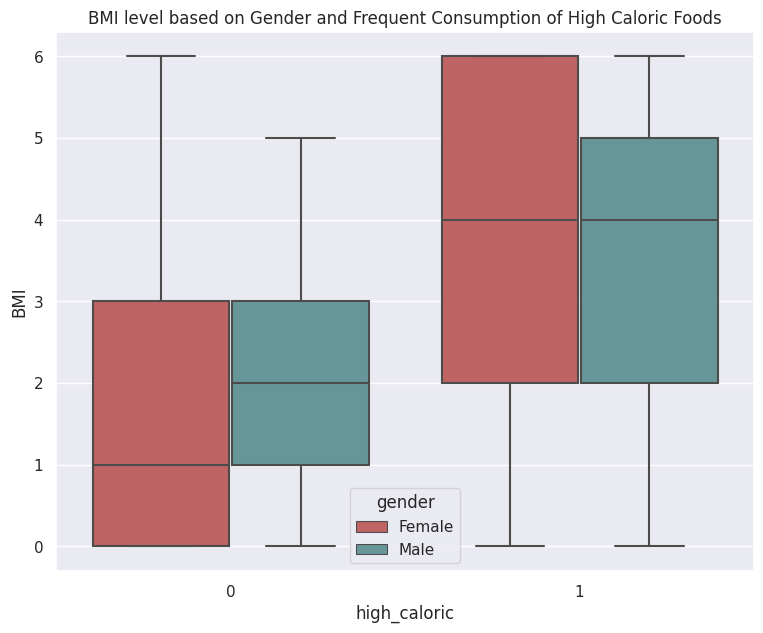

In [27]:
# Code used to see distribution of BMI level based on Gender and Frequent Consumption of High Caloric Foods using boxplot
fig, ax = plt.subplots(figsize = (9,7))
my_palette = {'Male': '#5F9EA0', "Female" : '#CD5555'}
sns.boxplot(y = "BMI", x = "high_caloric", hue = 'gender', data = df, ax = ax, palette = my_palette)
ax.set_title("BMI level based on Gender and Frequent Consumption of High Caloric Foods")
plt.show()

Based on the boxplot we can see how interaction of gender and frequent consumption influence the BMI level. A female who frequently consume high caloric foods is more likely to have similar BMI level with male who also frequently consume high caloric foods and both of them will more likely to have higher BMI level compared to female or male who is not frequently consume high caloric foods. However, this family history of overweight affects female more greatly where the difference means of BMI level is higher (1 vs 4) compared to male (2 vs 4) meaning female are more prone to have higher BMI level if they frequently consume high caloric foods.

#### 2. Interaction between Gender and Family History of Overweight

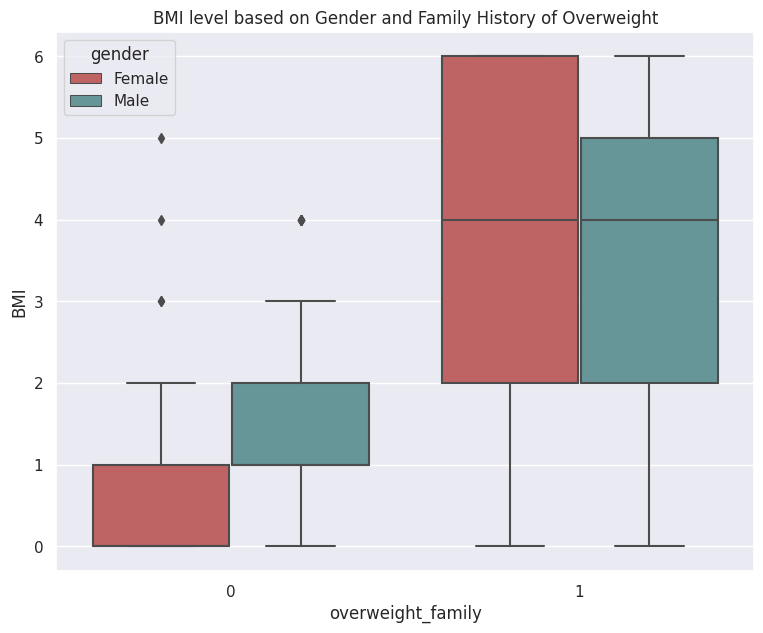

In [28]:
# Code used to see distribution of BMI level based on Gender and Family History of Overweight using boxplot
fig, ax = plt.subplots(figsize = (9,7))
my_palette = {'Male': '#5F9EA0', "Female" : '#CD5555'}
sns.boxplot(y = "BMI", x = "overweight_family", hue = 'gender', data = df, ax = ax, palette = my_palette)
ax.set_title("BMI level based on Gender and Family History of Overweight")
plt.show()

Based on the boxplot we can see how interaction of gender and family history of overweight influence the BMI level. A female who has family member who overweight is more likely to have similar BMI level with male who also has family member who overweight and both of them will more likely to have higher BMI level compared to female or male who has no family members who is overweight. However, this family history of overweight affects female more greatly where the difference means of BMI level is higher (1 vs 4) compared to male (2 vs 4) meaning female are more prone to have higher BMI level if they have family history of overweight.

#### 3. Interaction between Frequent Consumption of High Caloric Foods and Family History of Overweight

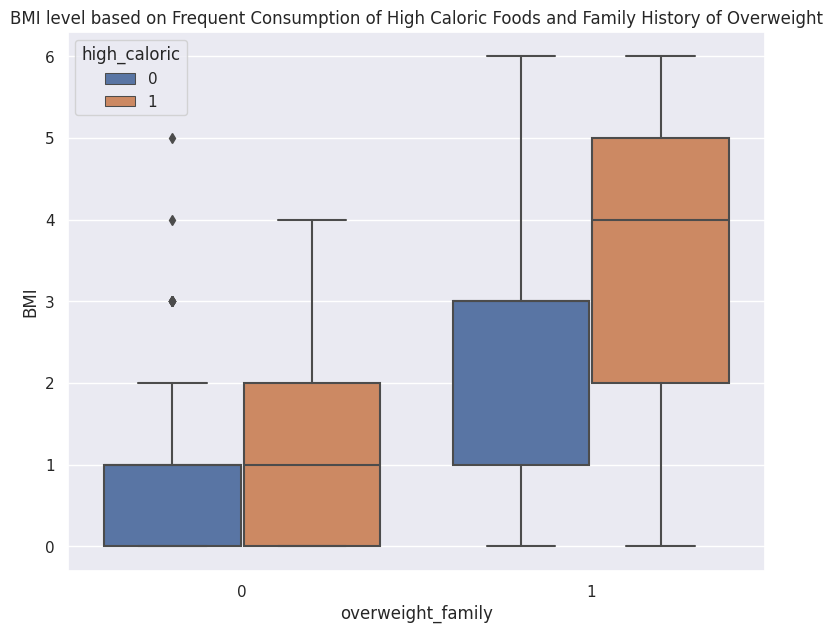

In [29]:
# Code used to see distribution of BMI level based on Frequent Consumption of High Caloric Foods and Family History of Overweight using boxplot
fig, ax = plt.subplots(figsize = (9,7))
sns.boxplot(y = "BMI", x ='overweight_family', hue = "high_caloric", data = df, ax = ax)
ax.set_title("BMI level based on Frequent Consumption of High Caloric Foods and Family History of Overweight")
plt.show()

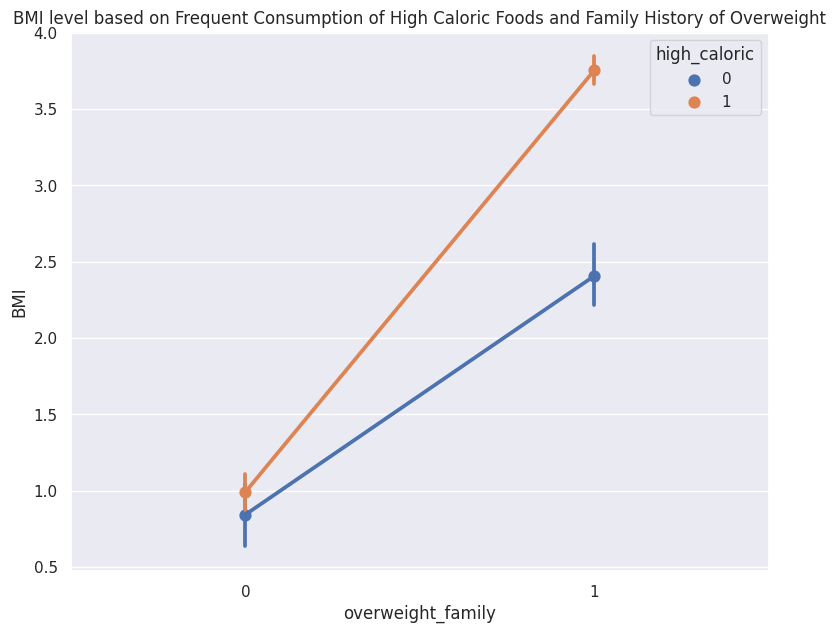

In [31]:
# Code used to see distribution of BMI level based on Frequent Consumption of High Caloric Foods and Family History of Overweight using boxplot
fig, ax = plt.subplots(figsize = (9,7))
sns.pointplot(x = "overweight_family", y ='BMI', hue = "high_caloric", data = df, ax = ax)
ax.set_title("BMI level based on Frequent Consumption of High Caloric Foods and Family History of Overweight")
plt.show()

Based on the boxplot and lineplot above, we can see how interaction of family history of overweight and frequent consumption of high caloric foods influence the BMI level. Someone who is more frequently consume high caloric foods and has family history of overweight is more likely to have higher BMI compared to someone who also has family history of overweight but is not frequently consume high caloric food. Even so, this family history of overweight factor greatly affects the BMI level. Whether someone is frequently consume high caloric food or not, if they have family history of overweight, they are more likely to have higher BMI level. 

## **Statistical Test**

In [30]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

#### 1. T-test for the difference between two population means: Gender Category

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Female BMI level is less than or equal to male BMI. 
$$ H_0:\mu_A ≤ \mu_B $$

$H_1$: Female BMI level is more than or equal to male BMI. 
$$ H_1:\mu_A > \mu_B $$

Significance level = 0.05

In [31]:
#Determining whether the data has equal or unequal variances

#Accessing column BMI data based on condition in gender column then save it as male variable
male = df.loc[df["gender"] == "Male"][["BMI"]].values
female = df.loc[df["gender"] == "Female"][["BMI"]].values

#Calculating the ratio of variance
#If the ratio is less than 4, they considered as equal
ratio = np.var(male)/np.var(female)
ratio

0.5478543062728571

Since the ratio of variances is less than 4, they are considered equal. Next, we can proceed with Student T-Test.

In [32]:
#Performing T-Test
result = ttest_ind(female, male, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.


print("Statistical Analysis Result")
print('-'*50)
print(f'Statistic value = {result.statistic}')
print(f'P value = {result.pvalue}')
print('-'*50)

#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



Statistical Analysis Result
--------------------------------------------------
Statistic value = [1.18418154]
P value = [0.11823995]
--------------------------------------------------
Conclusion:
Failed to reject the Null hypothesis


Based on statistical test, p-value is > 0.05 meaning there is no sufficient evidence that there is significant difference of BMI level means between female and male. Therefore, we failed to reject the null hypothesis.

#### 2. T-test for the difference between two population means: Smoking Status

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Smoker and nonsmoker BMI level are equal.
$$ H_0:\mu_A = \mu_B $$

$H_1$: Smoker and nonsmoker BMI level are not equal. 
$$ H_1:\mu_A 	≠ \mu_B $$

Significance level = 0.05

In [33]:
#Determining whether the data has equal or unequal variances

#Accessing column BMI data based on condition in gender column then save it as male variable
smoker= df.loc[df["smoke"] == 1][["BMI"]].values
nonsmoker = df.loc[df["smoke"] == 0][["BMI"]].values

#Calculating the ratio of variance
#If the ratio is less than 4, they considered as equal
ratio = np.var(smoker)/np.var(nonsmoker)
ratio

0.7922853329530194

Since the ratio of variances is less than 4, they are considered equal. Next, we can proceed with Student T-Test.

In [34]:
#Performing T-Test
result = ttest_ind(smoker, nonsmoker, equal_var = True, random_state = 42, alternative= 'two-sided')


print("Statistical Analysis Result")
print('-'*50)
print(f'Statistic value = {result.statistic}')
print(f'P value = {result.pvalue}')
print('-'*50)

#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



Statistical Analysis Result
--------------------------------------------------
Statistic value = [-0.07964458]
P value = [0.93652779]
--------------------------------------------------
Conclusion:
Failed to reject the Null hypothesis


Based on statistical test, p-value is > 0.05 meaning there is no sufficient evidence that there is significant difference of BMI level means between smoker and nonsmoker. Therefore, we failed to reject the null hypothesis.

#### 3. T-test for the difference between two population means: Frequent Consumption of High Caloric Foods

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: Frequent consumption of high caloric foods is less than or equal to infrequent consumption of high caloric foods.
$$ H_0:\mu_A ≤ \mu_B $$

$H_1$: Smoker and nonsmoker BMI level are not equal. 
$$ H_1:\mu_A > \mu_B $$

Significance level = 0.05

In [35]:
#Determining whether the data has equal or unequal variances

#Accessing column BMI data based on condition in gender column then save it as male variable
high_cal = df[df["high_caloric"] == 1][["BMI"]].values
low_cal = df[df["high_caloric"] == 0][["BMI"]].values

#Calculating the ratio of variance
#If the ratio is less than 4, they considered as equal
ratio = np.var(high_cal)/np.var(low_cal)
ratio

2.033955892756472

Since the ratio of variances is less than 4, they are considered equal. Next, we can proceed with Student T-Test.



In [36]:
#Performing T-Test
result = ttest_ind(high_cal, low_cal, equal_var = True, random_state = 42, alternative= 'greater')

print("Statistical Analysis Result")
print('-'*50)
print(f'Statistic value = {result.statistic}')
print(f'P value = {result.pvalue}')
print('-'*50)

#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



Statistical Analysis Result
--------------------------------------------------
Statistic value = [12.05228705]
P value = [1.16812709e-32]
--------------------------------------------------
Conclusion:
Reject the null hypothesis


Based on statistical test, p-value is < 0.05 meaning there is sufficient evidence that there is significant difference of BMI level means between frequent and infrequent consumption of high caloric foods, where someone who is frequently consume high caloric foods will have higher BMI level than someone who is not. Therefore, we reject the null hypothesis.

#### 4. T-test for the difference between two population means: Family History of Overweight

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: BMI level of someone who has family history of overweight is less than or equal to someone who does not have family history of overweight
$$ H_0:\mu_A 	≤ \mu_B $$

$H_1$:  BMI level of someone who has family history of overweight is bigger than someone who does not have family history of overweight
$$ H_1:\mu_A 	> \mu_B $$

Significance level = 0.05



In [37]:
#Determining whether the data has equal or unequal variances

#Accessing column BMI data based on condition in gender column then save it as male variable
over_family_yes = df[df["overweight_family"] == 1][["BMI"]].values
over_family_no = df[df["overweight_family"] == 0][["BMI"]].values

#Calculating the ratio of variance
#If the ratio is less than 4, they considered as equal
ratio = np.var(over_family_yes)/np.var(over_family_no)
ratio

3.1934055030078556

Since the ratio of variances is less than 4, they are considered equal. Next, we can proceed with Student T-Test.

In [38]:
#Performing T-Test
result = ttest_ind(over_family_yes, over_family_no, equal_var = True, random_state = 42, alternative= 'greater')

print("Statistical Analysis Result")
print('-'*50)
print(f'Statistic value = {result.statistic}')
print(f'P value = {result.pvalue}')
print('-'*50)

#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



Statistical Analysis Result
--------------------------------------------------
Statistic value = [26.56194812]
P value = [5.75159227e-134]
--------------------------------------------------
Conclusion:
Reject the null hypothesis


Based on statistical test, p-value is < 0.05 meaning there is sufficient evidence that there is significant difference of BMI level means between someone who has family history of overweight and someone who does not have, where someone who has family history of overweight will have higher BMI level than someone who does not have family history of overweight. Therefore, we reject the null hypothesis.

#### 5. ANOVA test for the effect of means of transportation

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: BMI level is all equal for all means of transportation
$$ H_0:\mu_A 	= \mu_B = \mu_C = \mu_D = \mu_E $$

$H_1$:  There is difference of BMI level at least for one means of transportation

Significance level = 0.05

In [39]:
#Creating Linear Equation
jenis_transportasi = ols('BMI ~ transportation', data = df).fit()

#Performing ANOVA test
aov_table_1 = sm.stats.anova_lm(jenis_transportasi)

print("ANOVA Test Result")
print('-'*75)
print(aov_table_1)
print('-'*75)


#Determining rule of decision
print('Conclusion:')
if result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")



ANOVA Test Result
---------------------------------------------------------------------------
                    df       sum_sq    mean_sq          F        PR(>F)
transportation     4.0   211.191973  52.797993  13.738532  4.667880e-11
Residual        2026.0  7786.037963   3.843059        NaN           NaN
---------------------------------------------------------------------------
Conclusion:
Reject the null hypothesis


Based on ANOVA test, p-value is < 0.05 meaning there is sufficient evidence that there is significant difference of BMI level at least one among means of transportation. This imply that difference means of transportation taken will influence the BMI level. Therefore, we reject the null hypothesis.

## **Correlation among Features**

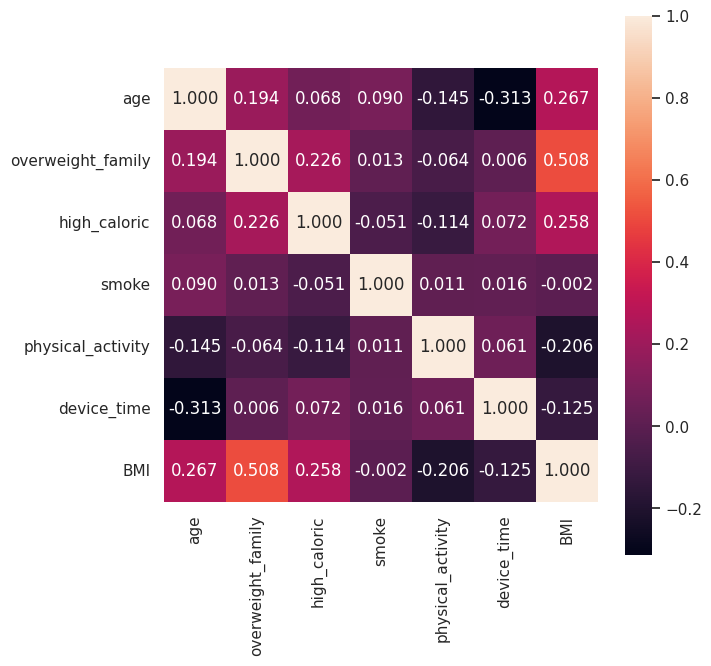

In [40]:
# Code used to see correlation among features
corr_ = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

From the correlation plot above, we can see that smoke variables has really weak correlation with BMI.

## **Regression Model**


Based on hypothetical testing we have conducted, we conclude that there are several variables that significantly influence BMI level and several variables that are not. Therefore, in building regression model, we exclude the variables that has no significant influence to BMI level so that the model built will be more accurate.

In [41]:
#Reviewing the data
df

,gender,age,overweight_family,high_caloric,smoke,physical_activity,device_time,transportation,BMI
0,Female,21.000000,1,0,0,0.000000,1.000000,Public_Transportation,1
1,Female,21.000000,1,0,1,3.000000,0.000000,Public_Transportation,1
2,Male,23.000000,1,0,0,2.000000,1.000000,Public_Transportation,1
3,Male,27.000000,0,0,0,2.000000,0.000000,Walking,2
4,Male,22.000000,0,0,0,0.000000,0.000000,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1,1,0,1.676269,0.906247,Public_Transportation,6
2107,Female,21.982942,1,1,0,1.341390,0.599270,Public_Transportation,6
2108,Female,22.524036,1,1,0,1.414209,0.646288,Public_Transportation,6
2109,Female,24.361936,1,1,0,1.139107,0.586035,Public_Transportation,6


In [42]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Use encoding to identify each means of transportation
encoded_df = pd.get_dummies(data = df, columns = ['transportation'])
encoded_df



,gender,age,overweight_family,high_caloric,smoke,physical_activity,device_time,BMI,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking
0,Female,21.000000,1,0,0,0.000000,1.000000,1,0,0,0,1,0
1,Female,21.000000,1,0,1,3.000000,0.000000,1,0,0,0,1,0
2,Male,23.000000,1,0,0,2.000000,1.000000,1,0,0,0,1,0
3,Male,27.000000,0,0,0,2.000000,0.000000,2,0,0,0,0,1
4,Male,22.000000,0,0,0,0.000000,0.000000,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1,1,0,1.676269,0.906247,6,0,0,0,1,0
2107,Female,21.982942,1,1,0,1.341390,0.599270,6,0,0,0,1,0
2108,Female,22.524036,1,1,0,1.414209,0.646288,6,0,0,0,1,0
2109,Female,24.361936,1,1,0,1.139107,0.586035,6,0,0,0,1,0


In [43]:
#Construct the model
lm1 = smf.ols('BMI ~  age + overweight_family + high_caloric + physical_activity + device_time + transportation_Automobile + transportation_Motorbike + transportation_Bike + transportation_Public_Transportation + transportation_Walking',
              data = encoded_df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          3.89e-209
Time:                        03:46:30   Log-Likelihood:                -3772.9
No. Observations:                2031   AIC:                             7566.
Df Residuals:                    2021   BIC:                             7622.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


The model we get from the output is:

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} - 0.839\times\text{transportation_Automobile} - 0.4689\times\text{transportation_Motorbike} - 0.3374\times\text{transportation_Bike} + 0.5405\times\text{transportation_Public_Transportation} - 0.4348\times\text{transportation_Walking} $$

The interpretation for the categorical variables are:
1. If someone's **age** is higher by 1 unit meaning that someone is 1 year older, the BMI level will **increase** by **0.095** unit.
2. If someone has **family history of overwight** the BMI level will **increase** by **2.2727** unit than if someone does not have the history.
3. If someone is **frequently consume high caloric value**, the BMI level will **increase** by **0.8242** unit than someone who is not.
4. If someone does more **physical activity** and which its value is higher by 1 unit, the BMI level will **decrease** by **0.2383** unit.
5. If someone spend more **time with their device** which its value is higher by 1 unit, the BMI level will **decrease** by **0.2676** unit.

Actually, there are 5 models that we get:

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} - 0.839\times\text{transportation_Automobile} $$

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} - 0.4689\times\text{transportation_Motorbike} $$

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} - 0.3374\times\text{transportation_Bike} $$

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} + 0.5405\times\text{transportation_Public_Transportation} $$

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} - 0.4348\times\text{transportation_Walking} $$


The interpretation for the categorical variables are:
1. If someone use **Automobile** as their means of transportation, their BMI will **decrease** by **0.839** unit.
2. If someone use **Motorbike** as their means of transportation, their BMI will **decrease** by **0.4689** unit.
3. If someone use **Bike** as their means of transportation, their BMI will **decrease** by **0.3374** unit.
4. If someone use **Public_Transportation** as their means of transportation, their BMI will **increase** by **0.5405** unit.
5. If someone use **Walking** as their means of transportation, their BMI will **decrease** by **0.4348** unit.

### **Analysis**
From the EDA and modelling, we can see that the variable of family history of overweight plays a significant role influence BMI level. Because of that, it is important to pay attention to our own BMI level so we do not affect the likelihood to increase BMI level of our kids' and generations after us since according to the research, obesity is highly associated with development of diseases. This can be done by switching our food intake from high calories foods to lower calories, do more physical activity, and riding bikes or walking.

From the model, we can see that the R-Squared of the model is 0.389. It means that only **38.9%** of the total variance in the data explained by the model, which is relatively really small. We can create a better model by choosing other predictors or adding more multiple predictors that have high correlation with BMI value. We can also do that by using other regression or even more sophisticated models to describe the data.

From the model, we can also see that the result is not quite what we expected to be. For example, we expected spending more time on device will result in higher BMI level yet our model shows contradiction. This can happen if the factor does not influence the model directly. Suppose someone using the device for listening to music while running or for watching yoga videos then the usage of the device could decrease the BMI level. For future research, the context of the variables we want to measure has to be clear.


## **Conclusions**

1. Predictor variables on data that significantly influence the the level of someone's BMI are age, family history of overweight, frequent consumption of high caloric foods, physical activity, device time, and means of transportations. \
a. Age: Someone who is older tends to have higher BMI level \
b. Family history of overweight: Someone who has family history of overweight tends to have higher BMI level \
c. Frequent consumption of high caloric foods: Someone who frequently consume high caloric foods tend to have higher BMI level \
d. Physical activity: Someone who does more physical activity tends to have lower BMI level \
e. Device time: Someone who spends more time on their device tends to have lower BMI level \
f. Means of transportations: Someone who use public transportation tends to have the highest BMI among others \


2. The correlation between variables and BMI:
a. Age has quite strong positive correlation with BMI level since the correlation coefficient is 0.267 \
b. Family history of overweight has strong positive correlation with BMI level since the correlation coefficient is 0.508 \
c. Frequent consumption of high caloric foods has quite strong positive correlation with BMI level since the correlation coefficient is 0.258 \
d. Smoke has weak negative correlation with BMI level since the correlation coefficient is 0.002 \
e. Physical activity has quite strong negative correlation with BMI level since the correlation coefficient is -0.206 \
f. Device time has quite strong negative correlation with BMI level since the correlation coefficient is 0.125 \

3. BMI level is modeled with linear regression with the result: \

$$\text{BMI} = -1.5395 + 0.095\times\text{age} + 2.2727 \times\text{overweight_family} + 0.8242\times\text{high_caloric} - 0.2383 \times\text{physical_activity} - 0.2676\times\text{device_time} - 0.839\times\text{transportation_Automobile} - 0.4689\times\text{transportation_Motorbike} - 0.3374\times\text{transportation_Bike} + 0.5405\times\text{transportation_Public_Transportation} - 0.4348\times\text{transportation_Walking} $$


## **Further Research**

1. Create a better model by choosing other predictors or adding more multiple predictors that have high correlation with BMI value. We can also do that by using other regression or even more sophisticated models to describe the data.
2. Clarify the context of each variables measured.